# Imports

In [1]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.functional as F
import torchvision.transforms as T

# Custom Dataset

In [2]:
class PawpularityDataset(Dataset):
    """Dataset for Pawpularity Kaggle competition"""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (str):
                Path to metadata CSV file
                
            root_dir (str):
                Directory containing images
                
            transform (callable, optional):
                Transformations to apply to images
        """
        
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        
    def __len__(self):
        return len(self.data)

    
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.root_dir, f'{self.data.iloc[idx].Id}.jpg'))
        
        sample = {'image': image, 'data': self.data.iloc[idx]}

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample
    
    
    def collage(self, num_rows=10, images_per_row=10):
        # Sample a random subset
        samples = np.random.randint(0, len(self), images_per_row*num_rows).tolist()

        # Open them and pad
        collage = []
        for i in range(num_rows):
            row = []
            for j in range(images_per_row):
                im = Image.open(os.path.join(self.root_dir, f'{self.data.iloc[samples.pop()].Id}.jpg'))
                im = pil_transform(pad_transform(im))

                # Shrink for easier viewing
                im.thumbnail((128, 128))

                row.append(im)

            collage.append(row)

        # Combine into a single image for viewing
        collage = np.vstack([np.hstack(row) for row in collage])
        return Image.fromarray(collage)

# Transforms

In [3]:
# Example code: https://discuss.pytorch.org/t/how-to-resize-and-pad-in-a-torchvision-transforms-compose/71850/10
class SquarePad:
    def __call__(self, image):
        max_wh = max(image.size)
        p_left, p_top = [(max_wh - s) // 2 for s in image.size]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.size, [p_left, p_top])]
        padding = (p_left, p_top, p_right, p_bottom)
        return F.pad(image, padding, 0, 'constant')

In [4]:
target_image_size = (1280, 1280)  # Maximum size of images in dataset

pad_transform = T.Compose([
    SquarePad(),
    T.Resize(target_image_size),
    T.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Example

In [5]:
dataset = PawpularityDataset('../data/train.csv', '../data/train', transform=pad_transform)

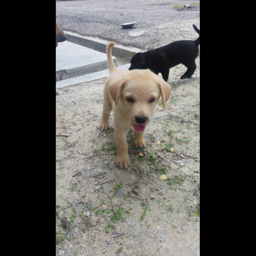

Id               0007de18844b0dbbb5e1f607da0606e0
Subject Focus                                   0
Eyes                                            1
Face                                            1
Near                                            1
Action                                          0
Accessory                                       0
Group                                           1
Collage                                         0
Human                                           0
Occlusion                                       0
Info                                            0
Blur                                            0
Pawpularity                                    63
Name: 0, dtype: object

In [6]:
pil_transform = T.ToPILImage()

sample = dataset.__getitem__(0)

image = sample['image']
image = pil_transform(sample['image'])
image.thumbnail((256, 256))
image.show()
sample['data']

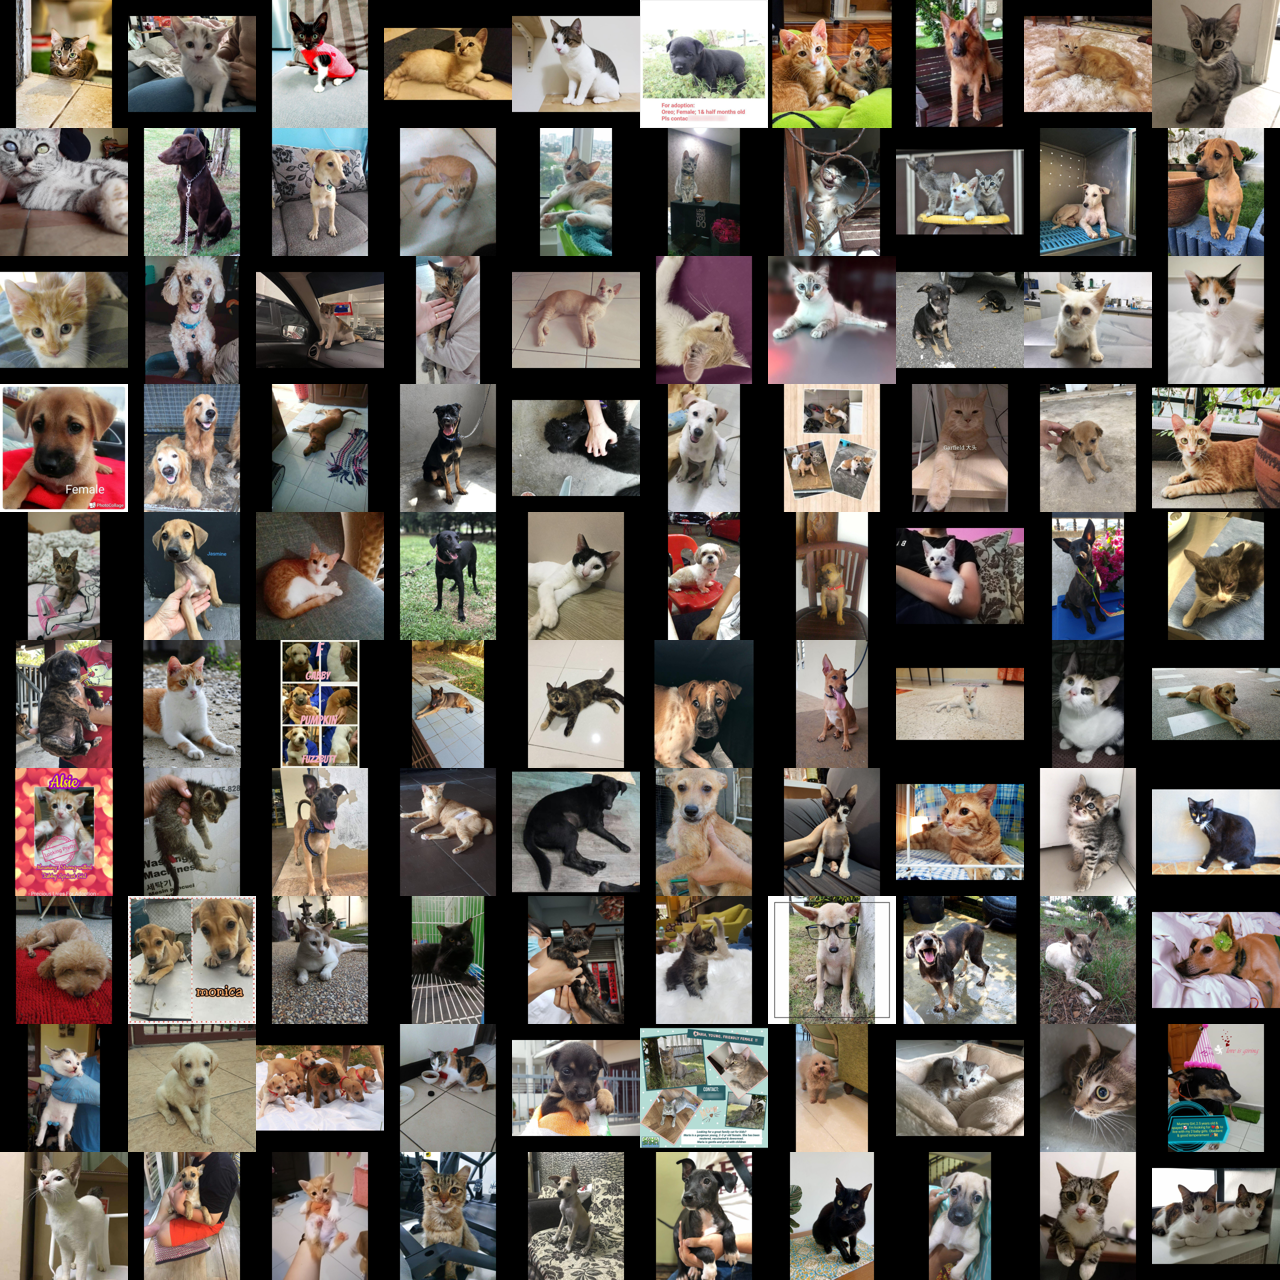

In [7]:
dataset.collage(num_rows=10, images_per_row=10)